In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install imblearn # install the missing package

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 2.0 MB/s eta 0:00:00


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import LabelEncoder

from nltk.stem import WordNetLemmatizer

from imblearn.over_sampling import SMOTE

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import re

import warnings

warnings.filterwarnings("ignore")

!pip install scikit-learn --upgrade
import nltk
import pandas as pd
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
# read the datafile
train_data = pd.read_csv("/content/drive/MyDrive/Accredian_Capstone_1013/Data/Train_data.csv")
test_data = pd.read_csv("/content/drive/MyDrive/Accredian_Capstone_1013/Data/Test_data.csv")

In [5]:
print(train_data.shape)
print(test_data.shape)

(160682, 7)
(40171, 6)


In [6]:
train_data =train_data.iloc[0:int(train_data.shape[0]/4)] # Cast the result of the division to an integer
test_data = test_data.iloc[0:int(test_data.shape[0]/4)] # Cast the result of the division to an integer

In [7]:
print(train_data.shape)
print(test_data.shape)

(40170, 7)
(10042, 6)


In [8]:
train_data.tail(2)

,REF_NO,headline,authors,link,short_description,date,category
40168,84108,"Meet Janae Marie Kroc, Recently Out Transgende...",James Michael Nichols,https://www.huffingtonpost.com/entry/meet-jana...,"""My story isn’t about being a man or a woman o...",2015-08-01,QUEER VOICES
40169,124891,Seabed Search For MH370 Could End Within A Week,Unknown,https://www.huffingtonpost.com/entry/malaysia-...,NaN,2014-04-19,WORLDPOST


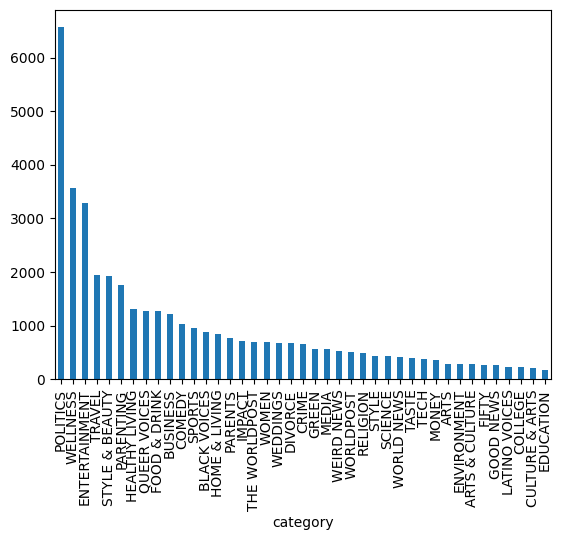

In [9]:
train_data.category.value_counts().plot(kind='bar');

In [10]:
chichewa = ['i', 'ine', 'wanga', 'inenso', 'ife', 'athu', 'athu', 'tokha', 'inu', 'ndinu','iwe ukhoza', 'wako','wekha','nokha','iye','wake','iyemwini','icho','ndi','zake','lokha','iwo','awo','iwowo','chiyani','amene', 'uyu', 'uyo', 'awa', "ndili", 'ndi', 'ali','anali','khalani','akhala','kukhala',' Khalani nawo','wakhala','anali','chitani','amachita','kuchita', 'a', 'an', 'pulogalamu ya', 'ndi', 'koma', 'ngati', 'kapena', 'chifukwa', 'monga', 'mpaka', 'pamene', 'wa', 'pa ',' by','chifukwa' 'ndi','pafupi','kutsutsana','pakati','kupyola','nthawi', 'nthawi','kale','pambuyo','pamwamba', 'pansipa', 'kuti', 'kuchokera', 'mmwamba', 'pansi', 'mu', 'kunja', 'kuyatsa', 'kuchoka', 'kutha', 'kachiwiri', 'kupitilira','kenako',' kamodzi','apa','apo','liti','pati','bwanji','onse','aliyense','onse','aliyense', 'ochepa', 'zambiri', 'ambiri', 'ena', 'otero', 'ayi', 'kapena', 'osati', 'okha', 'eni', 'omwewo', 'kotero',' kuposa','nawonso',' kwambiri','angathe','ndidzatero','basi','musatero', 'musachite',' muyenera', 'muyenera kukhala','tsopano', 'sali', 'sindinathe','​​sanachite','satero','analibe', 'sanatero','sanachite','sindinatero','ayi','si', 'ma', 'sizingatheke','mwina','sayenera', 'osowa','osafunikira', 'shan' , 'nenani', 'sayenera', 'sanali', 'anapambana', 'sangachite', 'sanakonde', 'sangatero']

In [11]:
#cleaning texts
wn = WordNetLemmatizer()

def text_preprocessing(review):
    review = re.sub('[^a-zA-Z]', ' ', review)
    review = review.lower()
    review = review.split()
    review = [wn.lemmatize(word) for word in review if not word in chichewa]
    review = ' '.join(review)
    return review

In [12]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [13]:
# train_data['short_description'] = train_data['short_description'].apply(text_preprocessing)
# test_data['short_description'] = test_data['short_description'].apply(text_preprocessing)
# print(train_data.head())
# print(test_data.head())

In [14]:
wn = WordNetLemmatizer()

def text_preprocessing(review):
    # Handle potential non-string values
    if not isinstance(review, str):
        review = str(review)  # Convert to string if not already

    review = re.sub('[^a-zA-Z]', ' ', review)
    review = review.lower()
    review = review.split()
    review = [wn.lemmatize(word) for word in review if not word in chichewa]
    review = ' '.join(review)
    return review

train_data['short_description'] = train_data['short_description'].apply(text_preprocessing)
test_data['short_description'] = test_data['short_description'].apply(text_preprocessing)
print(train_data.head())
print(test_data.head())

   REF_NO                                           headline  \
0  123291                         Putin, Fear and Leadership   
1   37541  Barack Obama Failed To Get A New Climate Law, ...   
2   84614  Senate GOP Leaders Want To Put Ted Cruz In A T...   
3   88293        3 Uncommon Ways to Maintain Your Real Focus   
4   32519  Trump Wants To Dismantle The Clean Water Rule....   

                                             authors  \
0  James A. Cusumano, Ph.D., ContributorOwner and...   
1                                      Kate Sheppard   
2                                 Laura Barrón-López   
3  Lisa Bennett, ContributorAuthor and Communicat...   
4                                Dominique Mosbergen   

                                                link  \
0  https://www.huffingtonpost.com/entry/the-simil...   
1  https://www.huffingtonpost.com/entry/barack-ob...   
2  https://www.huffingtonpost.com/entry/senate-go...   
3  https://www.huffingtonpost.com/entry/three-unc...  

In [15]:
# vectorizer = TfidfVectorizer()
# X = vectorizer.fit_transform(train_data['short_description']).toarray()
# training = pd.DataFrame(X, columns=vectorizer.get_feature_names_out())
# print(training.shape)

# X_test_final = vectorizer.transform(test_data['short_description']).toarray()
# test_new = pd.DataFrame(X_test_final, columns=vectorizer.get_feature_names_out())
# print(test_new.shape)

(40170, 32193)
(10042, 32193)


In [16]:

#check to see if get_feature_names is a variable in your environment and rename if necessary

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(train_data['short_description']).toarray()
training = pd.DataFrame(X, columns=vectorizer.get_feature_names_out()) #use get_feature_names_out() for scikit-learn version 0.24+
print(training.shape)

X_test_final = vectorizer.transform(test_data['short_description']).toarray()
test_new = pd.DataFrame(X_test_final, columns=vectorizer.get_feature_names_out())
print(test_new.shape)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 70.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2
(40170, 32193)
(10042, 32193)


In [17]:
training.head() #check first five rows

,aa,aaa,aapi,aapl,aardvark,aaron,aarp,ab,aback,abad,...,zuckerberg,zuckerborg,zuckerman,zucks,zuleyka,zuma,zumba,zurich,zvelo,zwgd
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
X = training
y = train_data['category']

In [19]:
label_encoder = LabelEncoder()
y_label = label_encoder.fit_transform(y)

In [20]:
smote = SMOTE()
X, y_label = smote.fit_resample(X,y_label)
np.bincount(y_label)

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7cab5a009900>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1175, in _make_controller_from_path
    lib_controller = controller_class(
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: dlopen() error


array([6560, 6560, 6560, 6560, 6560, 6560, 6560, 6560, 6560, 6560, 6560,
       6560, 6560, 6560, 6560, 6560, 6560, 6560, 6560, 6560, 6560, 6560,
       6560, 6560, 6560, 6560, 6560, 6560, 6560, 6560, 6560, 6560, 6560,
       6560, 6560, 6560, 6560, 6560, 6560, 6560, 6560])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_label, test_size=0.1, random_state=0)

model = SGDClassifier(loss='hinge',
                      alpha=4e-4,
                      max_iter=20,
                      verbose=True)
model.fit(X_train, y_train)

In [22]:
pred = model.predict(X_test)
print("Train Accuracy Score:",round(model.score(X_train, y_train),2))
print("Test Accuracy Score:",round(accuracy_score(y_test, pred),2))

Train Accuracy Score: 0.73
Test Accuracy Score: 0.71


In [62]:
y_test

array([21, 26, 29, ...,  2,  2, 36])

In [23]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.91      0.53      0.67       675
           1       0.80      0.97      0.88       635
           2       0.78      0.70      0.74       654
           3       0.81      0.54      0.65       650
           4       0.74      0.74      0.74       652
           5       0.86      0.48      0.62       648
           6       0.83      0.68      0.74       658
           7       0.85      1.00      0.92       647
           8       0.87      0.91      0.89       714
           9       0.73      0.88      0.80       664
          10       0.58      0.21      0.31       677
          11       0.86      0.98      0.92       684
          12       0.79      0.74      0.76       643
          13       0.78      0.79      0.79       668
          14       0.80      0.68      0.74       693
          15       0.87      0.73      0.79       635
          16       0.71      0.47      0.57       607
          17       0.78    

In [24]:
test_pred = label_encoder.inverse_transform(pred)
test_label = label_encoder.inverse_transform(y_test)
cf_matrix = confusion_matrix(test_pred, test_label)

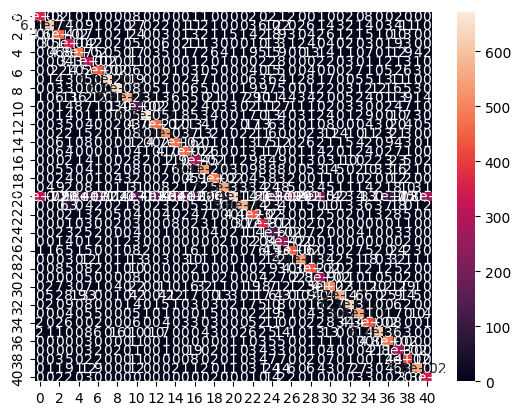

In [25]:
sns.heatmap(cf_matrix, annot=True);

In [27]:
#Saving the model . this model got 71% test accuracy
import pickle
filename = 'news_classification_SGDClassified_71percent_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [67]:
#pickle the vectorizer
import pickle
filename = 'SGD_tfidf_vectorizer.sav'
pickle.dump(vectorizer, open(filename, 'wb'))

In [68]:
#pickle the label encoder
import pickle
filename = 'SGD_label_encoder.sav'
pickle.dump(label_encoder, open(filename, 'wb'))

## Evaluation

In [31]:
print(pred)
#extracting the classes from the label encoder
encoded_classes = label_encoder.classes_
#mapping the encoded output to actual categories
predicted_category = [encoded_classes[x] for x in pred]
true_category = [encoded_classes[x] for x in y_test]

[21 26 20 ...  2  2 36]


In [ ]:
result_df = pd.DataFrame({'description':X_test,'true_category':true_category, 'predicted_category':predicted_category})
result_df.head()

In [46]:
# Assuming X_test is a 2D array of text descriptions,
# flatten it to a 1D array before creating the DataFrame
result_df = pd.DataFrame({
                         'true_category': true_category,
                         'predicted_category': predicted_category})
result_df

,true_category,predicted_category
0,MONEY,MONEY
1,RELIGION,RELIGION
2,STYLE,MEDIA
3,THE WORLDPOST,THE WORLDPOST
4,WEDDINGS,WEDDINGS
...,...,...
26891,MONEY,MONEY
26892,WEIRD NEWS,WEIRD NEWS
26893,BLACK VOICES,BLACK VOICES
26894,BLACK VOICES,BLACK VOICES


In [50]:
X_test.head()

,aa,aaa,aapi,aapl,aardvark,aaron,aarp,ab,aback,abad,...,zuckerberg,zuckerborg,zuckerman,zucks,zuleyka,zuma,zumba,zurich,zvelo,zwgd
165214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
188819,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
206915,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
226363,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
236091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
pred_test = pd.DataFrame({'description':'There are some who say the Democratic Party should stop talking so much about issues affecting women and people of color'},index=[0])
pred_test['description'] = pred_test['description'].apply(text_preprocessing)
# print(pred_test)
pred_test = vectorizer.transform(pred_test).toarray()
print(model.predict(pred_test))
# print(label_encoder.inverse_transform(model.predict(pred_test)))


[4]


In [65]:
pred_test = pd.DataFrame({'description':'There are some who say the Democratic Party should stop talking so much about issues affecting women and people of color'},index=[0])
pred_test['description'] = pred_test['description'].apply(text_preprocessing)
pred_test = vectorizer.transform(pred_test['description']).toarray()

In [66]:
prediction = model.predict(pred_test)
print(label_encoder.inverse_transform(prediction))

['POLITICS']
